# Selectivity metrics of m/z and chromatography in asari

Selectivity metrics include:

- mSelectivity, how distinct are m/z measurements
- cSelectivity, how distinct are chromatograhic elution peaks
- dSelectivity, how distinct are database records

In output feature tables, cSelectivity is reported.

mSelectivity and dSelectivity are implicit in some of the processes. But it is still critical to consider them.


In [1]:
!pip install --upgrade asari-metabolomics

Requirement already up-to-date: asari-metabolomics in /opt/conda/lib/python3.7/site-packages (1.7.5)


In [2]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt

datadir = 'asari_project_MT01_51162751'

In [3]:
# load composite map
cmap = pickle.load( open(os.path.join(datadir, 'export', 'cmap.pickle'), 'rb') )

In [4]:
cmap.keys()

dict_keys(['_number_of_samples_', 'rt_length', 'dict_scan_rtime', 'list_mass_tracks', 'MassGrid'])

In [5]:
cmap['rt_length']

1018

In [6]:
cmap['dict_scan_rtime'][210]

81.01243715299981

In [7]:
rtu = cmap['dict_scan_rtime'][210]/210
81.012437/rtu

209.99999960339474

In [8]:
def plot_masstrack(track, color='m', start=100, end=400, yticks=[0, 5e7, 1e8]):
    plt.figure(figsize=(10, 4))
    X = range(start, end)
    Y = track['intensity'][start: end]
    plt.plot(X, Y, color=color, marker='o', markersize=3, linestyle='None') # 'dashed'
    plt.yticks(yticks)


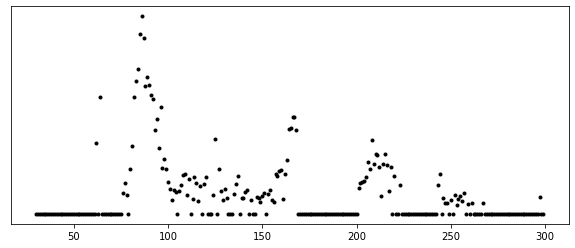

In [9]:
# cSel = 0.67/0.53 for peaks in track 4889
# F7964	427.2803	33.8	31.07	40.39	4889	1221314	0.67	0.85	63
# F7965	427.2803	81.79	77.57	83.74	4889	401800	0.53	0.4	22

plot_masstrack(cmap['list_mass_tracks'][4889], color='k', start=30, end=300, yticks=[])

In [10]:
for x in [31.07, 40.39, 77.57, 83.74]:
    print(x/rtu)

80.53948540861046
104.69873883661978
201.07653309127494
217.07037361174895


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  # Remove the CWD from sys.path while we load stuff.


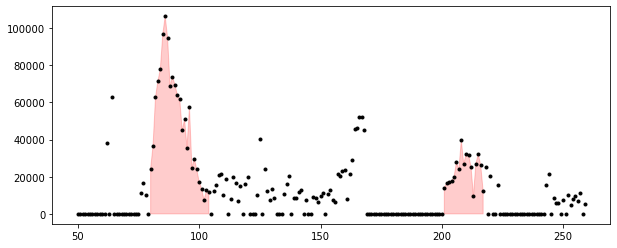

In [11]:
X = range(50, 260)
Y = cmap['list_mass_tracks'][4889]['intensity'][X]
X2 = range(80, 105)
Y2 = cmap['list_mass_tracks'][4889]['intensity'][X2]
X3 = range(201, 218)
Y3 = cmap['list_mass_tracks'][4889]['intensity'][X3]

plt.figure(figsize=(10, 4))
plt.plot(X, Y, color='k', marker='o', markersize=3, linestyle='None') # 'dashed'
plt.fill_between(X2, Y2, color='R0', alpha=0.2,)
plt.fill_between(X3, Y3, color='R0', alpha=0.2,)

plt.savefig("Figure_cSelectivity_example_track4889.pdf")

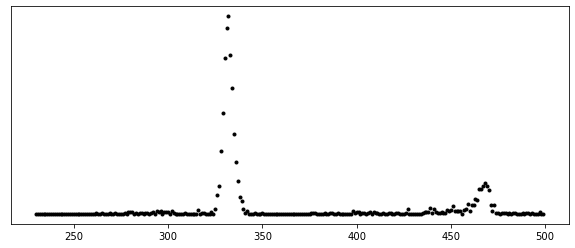

In [12]:
# cSel = 1 for both peaks in track 1975
# F2013	217.1183	128.14	125.43	131.62	1975	8138952	1	0.99	690
# F2014	217.1183	180.42	177.29	183.15	1975	1521017	1	0.9	109
plot_masstrack(cmap['list_mass_tracks'][1975], color='k', start=230, end=500, yticks=[])

In [13]:
for x in [125.43, 131.62, 177.29, 183.15]:
    print(x/rtu)

325.1389653943357
341.1846498062861
459.57017599267937
474.76043619526894


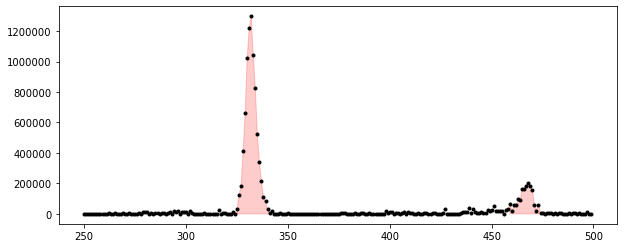

In [14]:
X = range(250, 500)
Y = cmap['list_mass_tracks'][1975]['intensity'][X]
X2 = range(325, 342)
Y2 = cmap['list_mass_tracks'][1975]['intensity'][X2]
X3 = range(459, 475)
Y3 = cmap['list_mass_tracks'][1975]['intensity'][X3]

plt.figure(figsize=(10, 4))
plt.plot(X, Y, color='k', marker='o', markersize=3, linestyle='None') # 'dashed'
plt.fill_between(X2, Y2, color='R0', alpha=0.2,)
plt.fill_between(X3, Y3, color='R0', alpha=0.2,)

plt.savefig("Figure_cSelectivity_example_track1975.pdf")

The above figures illustrate peaks within a mass track.

cSelectivity of a peak is defined by: 

the fraction of data points in defined peaks of all data points above half of the intensity of the peak.

## We next illustrate the mSelectivity

using some random m/z values pulled out of an object.

In [15]:
# just to get some example mz data
emp_cpds_trees = pickle.load( open(os.path.join('asari', 'db', 'emp_cpds_trees.pickle'), 'rb') )

In [16]:
[x for x in emp_cpds_trees['pos'].keys() if 36305 < x < 36323]

[36310,
 36318,
 36309,
 36317,
 36308,
 36314,
 36311,
 36321,
 36316,
 36312,
 36319,
 36322,
 36315,
 36307,
 36320,
 36306,
 36313]

In [17]:
emp_cpds_trees['pos'][36318]

[{'mz': 363.18021503077,
  'parent_epd_id': 'C20H26O6_362.172939',
  'ion_relation': 'M+H[1+]'},
 {'mz': 363.18909848276996,
  'parent_epd_id': 'C17H28N2O5_340.199822',
  'ion_relation': 'M+Na[1+]'},
 {'mz': 363.18054516976997,
  'parent_epd_id': 'C21H26NO3_340.191269',
  'ion_relation': 'M+Na[1+]'},
 {'mz': 363.18025034477,
  'parent_epd_id': 'C20H24O5_344.162374',
  'ion_relation': 'M+H2O+H[1+]'}]

In [18]:
mL = []
for k,v in emp_cpds_trees['pos'].items():
    if 36500 < k < 36550:
        mL += [ii['mz'] for ii in v]
        

In [19]:
mL.sort()

In [20]:
from asari.mass_functions import calculate_selectivity

In [21]:
spL = calculate_selectivity(mL)

In [22]:
len(mL)

77

In [23]:
X = mL[30:50]
Y = spL[30:50]

Text(0.5, 1.0, 'm/z selectivity (zoom in)')

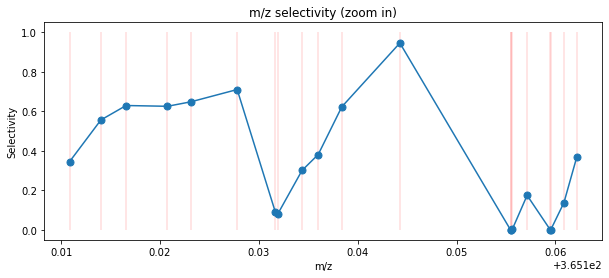

In [24]:
plt.figure(figsize=(10,4))

plt.plot(X, Y, '-o', markersize=7)
plt.vlines(X, 0, 1, color='r',linewidth=0.2)
plt.xlabel("m/z")
plt.ylabel("Selectivity")
plt.title("m/z selectivity (zoom in)")

## Conclusion

The above figure illustrates mSelectivity.

Not the best example. We had more explanatory figures from 1st DB construction notebook.